<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.random.seed(seed=1234)
random.seed(1234)

In [32]:
data = pd.read_csv(r"https://raw.githubusercontent.com/GokuMohandas/madewithml/main/datasets/spiral.csv", header=0)

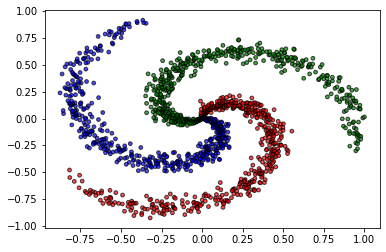

In [33]:
X = data.iloc[:, 0:2].values
y = data.iloc[:,2].values

color = {'c1':'red', 'c2':'blue', 'c3':'green'}

plt.scatter(X[:,0], X[:,1], c=[color[i] for i in y], s=14, edgecolors='K', alpha=0.7)
plt.show()

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_, y_train, y_ = train_test_split(X, y, stratify=y, train_size=0.7)
X_test, X_val, y_test, y_val = train_test_split(X_, y_, stratify=y_, train_size=0.5)

print(X_train.shape, X_test.shape, X_val.shape)

(1050, 2) (225, 2) (225, 2)


In [35]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder().fit(y_train)

label.classes_

array(['c1', 'c2', 'c3'], dtype=object)

In [36]:
y_train = label.transform(y_train)
y_test = label.transform(y_test)
y_val = label.transform(y_val)

In [37]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)

In [38]:
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
X_val = X_scaler.transform(X_val)

In [39]:
print(np.mean(X_test), np.mean(X_val))
print(np.std(X_test), np.std(X_val))

0.02219904079598848 0.03639193439764537
0.9691390181006329 1.0313053532035132


In [40]:
data.color.unique()

array(['c1', 'c3', 'c2'], dtype=object)

In [41]:
data2 = data[(data.color == 'c1') | (data.color == 'c2')]

In [42]:
X_2 = data2.iloc[:,0:2].values
y_2 = data2.iloc[:,2].values

_Xtrain, _X, _ytrain, _y = train_test_split(X_2, y_2, stratify=y_2, train_size=0.7)
_Xtest, _Xval, _ytest, _yval = train_test_split(_X, _y, stratify=_y, train_size=0.5)

In [43]:
le = LabelEncoder().fit(_ytrain)

_ytrain = le.transform(_ytrain)
_ytest = le.transform(_ytest)
_yval = le.transform(_yval)

In [44]:
_Xscaler = StandardScaler().fit(_Xtrain)

_Xtrain = _Xscaler.transform(_Xtrain)
_Xtest = _Xscaler.transform(_Xtest)
_Xval = _Xscaler.transform(_Xval)

print(np.mean(_Xtest), np.mean(_Xtest))
print(np.std(_Xval), np.std(_Xval))

0.018579716677184402 0.018579716677184402
0.9417582622862672 0.9417582622862672


In [45]:
_ytrain = _ytrain[:, np.newaxis]
_ytest = _ytest[:, np.newaxis]
_yval = _yval[:, np.newaxis]

In [46]:
p = _Xtrain.shape[1]

n = _Xtrain.shape[0]

p

2

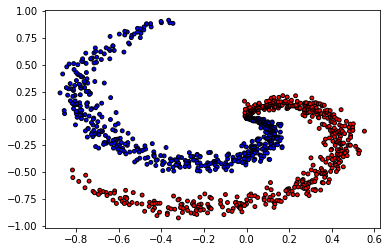

In [47]:
colors = {'c1':'red', 'c2':'green'}

plt.scatter(X_2[:,0], X_2[:,1], c=[color[i] for i in y_2], s=15, edgecolors='k')
plt.show()

In [48]:
# create kayer

class Neural_Layer():

  def __init__(self, n_unit, n_neur, act_f):

    self.act_f = act_f

    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_unit, n_neur) * 2 - 1


In [49]:
# activation function

sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x*(1-x))

relu = lambda x: np.maximum(0, x)

In [50]:
# create neurakl network

def create_nn(topology, act_f):

  nn = []

  for l, layer in enumerate(topology[:-1]):

    nn.append(Neural_Layer(topology[l], topology[l + 1], act_f))

  return nn



In [83]:
# fordward pass
topology = [p, 2, 8, 4, 1]

neural_net = create_nn(topology, sigm)

f_loss = (lambda Yp, Yr: np.mean((Yp - Yr) ** 2),
          lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, y, f_loss, lr, train=True):

  out = [(None, X)]

  # forward pass
  for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z, a))

  #print(z.shape, a.shape)

  if train:

    deltas = []

    # Backward
    for l in reversed(range(0, len(neural_net))):

      z = out[l + 1][0]
      a = out[l + 1][1]

      # print(a.shape)

      if l == len(neural_net) - 1:

        deltas.insert(0, f_loss[1](a, y) * neural_net[l].act_f[1](a))
      
      else:
 
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))

      _W = neural_net[l].W

    # print(deltas)

      neural_net[l].b += - np.mean(deltas[0], axis=0, keepdims=True) * lr

      neural_net[l].W += - out[l][1].T @ deltas[0] * lr

  return out[-1][1]

forward(neural_net, _Xtrain, _ytrain, f_loss, 0.01)


array([[0.5701761 ],
       [0.57496782],
       [0.57147763],
       [0.57021075],
       [0.5710205 ],
       [0.57131654],
       [0.57418743],
       [0.57157851],
       [0.57165182],
       [0.57193402],
       [0.57105102],
       [0.5764819 ],
       [0.57165082],
       [0.57731439],
       [0.57083729],
       [0.57149918],
       [0.57140152],
       [0.57539276],
       [0.57498734],
       [0.57061161],
       [0.57107264],
       [0.57319068],
       [0.57134057],
       [0.57010152],
       [0.57402096],
       [0.57644897],
       [0.57398531],
       [0.57124333],
       [0.57032437],
       [0.57239929],
       [0.571414  ],
       [0.57466511],
       [0.57204628],
       [0.57060013],
       [0.57020143],
       [0.57058937],
       [0.57169565],
       [0.57030169],
       [0.57683417],
       [0.57296486],
       [0.57358465],
       [0.57133634],
       [0.57094263],
       [0.57344088],
       [0.57696492],
       [0.57118474],
       [0.57625771],
       [0.570

In [67]:
_Xtest[_ytest[:,0]==0, 0]

array([ 1.46501802,  0.23187578,  1.21944653,  1.25159879,  1.3746891 ,
        0.9352781 ,  0.9300853 ,  0.94850257,  1.2996631 ,  1.48872068,
        0.73275131,  1.09970443,  0.25013676,  0.32067496, -0.06596328,
        0.25632731,  0.28368158,  1.1530897 , -0.4190045 ,  1.18013503,
        0.07129981, -0.84456372,  0.1704168 ,  0.45806768, -0.54565488,
        1.3581701 , -0.21935066,  0.29063102,  0.47631302,  1.17172198,
        0.55721433,  0.48950199,  0.57008545,  1.17783808,  1.4428063 ,
        0.24591917,  1.22703682,  0.53259918,  0.47184075,  1.04390163,
        0.31455975,  1.06465791, -0.70449099,  1.31662374, -1.31434282,
        0.99916939,  0.92976802, -0.32554631,  0.60755506,  1.35394477,
        1.28092504,  1.30827778,  1.27013316, -1.0089337 ,  0.69415811,
        1.26718631,  0.95847048,  1.34026851,  0.94727064,  0.33374918,
        0.22685119,  0.25033918,  0.57064441, -0.57101464,  1.35398458,
        0.62597012,  0.80290742,  0.77886645,  0.38898317,  1.03

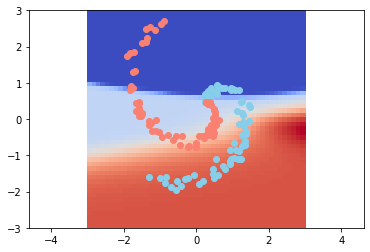

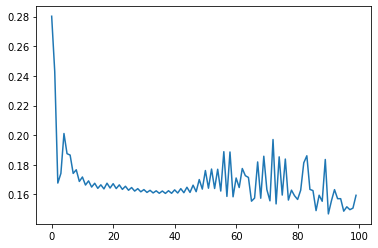

In [84]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):

  y_pred = train(neural_n, _Xtest, _ytest, f_loss, 0.2, True)

  if i % 25 == 0:

    print(y_pred)

    loss.append(f_loss[0](y_pred, _ytest))

    _x0 = np.linspace(-3, 3, 50)
    _x1 = np.linspace(-3, 3, 50)

    _y = np.zeros((50,50))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):

        _y[i0, i1] = train(neural_n, np.array([[x0,x1]]), y, f_loss, lr=0.05, train=False)[0][0]

    plt.pcolormesh(_x0, _x1, _y, cmap='coolwarm')
    plt.axis('equal')

    plt.scatter(_Xtest[_ytest[:,0] == 0, 0], _Xtest[_ytest[:,0]==0, 1], c='skyblue')
    plt.scatter(_Xtest[_ytest[:,0] == 1, 0], _Xtest[_ytest[:,0]==1, 1], c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.3)